In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset/upload_DJIA_table.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,7/1/2016,17924.24023,18002.38086,17916.91016,17949.36914,82160000,17949.36914
1,6/30/2016,17712.75977,17930.60938,17711.80078,17929.99023,133030000,17929.99023
2,6/29/2016,17456.01953,17704.50977,17456.01953,17694.67969,106380000,17694.67969
3,6/28/2016,17190.50977,17409.72070,17190.50977,17409.72070,112190000,17409.72070
4,6/27/2016,17355.21094,17355.21094,17063.08008,17140.24023,138740000,17140.24023


In [4]:
df['Date'] = pd.to_datetime(df["Date"],format='%m/%d/%Y')

In [5]:
df.sort_values(by=["Date"],inplace=True)

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,11432.08984,11759.95996,11388.04004,11734.32031,212830000,11734.32031
1987,2008-08-11,11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961
1986,2008-08-12,11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973
1985,2008-08-13,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996
1984,2008-08-14,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969


In [7]:
df['vol_ratio'] = df["Close"].pct_change()

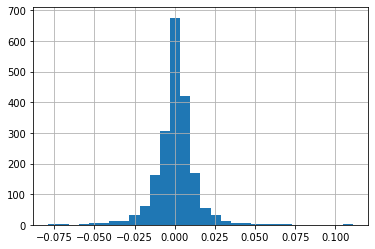

In [8]:
df.vol_ratio.hist(bins=30)

In [9]:
print('Average Daily Return: {:.5%}'.format(df.vol_ratio.mean()))
print('Std Daily Return: {:.5%}'.format(df.vol_ratio.std()))

Average Daily Return: 0.02937%
Std Daily Return: 1.26499%


In [10]:
daily_return_mean = df.vol_ratio.mean()
daily_return_std = df.vol_ratio.std()

In [11]:
df_vol = df[(df.vol_ratio >= (daily_return_mean + daily_return_std)) 
           | (df.vol_ratio <= (daily_return_mean - daily_return_std))]

In [12]:
df_news = pd.read_csv('dataset/Combined_News_DJIA.csv')

In [13]:
df_news['Date'] = pd.to_datetime(df_news["Date"],format='%m/%d/%Y')

In [14]:
df_vol_news = df_news[df_news["Date"].isin(df_vol['Date'])]

In [15]:
df_vol_news.shape

(378, 27)

In [16]:
df_vol_news.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
6,2008-08-18,0,"b'In an Afghan prison, the majority of female ...","b""Little girl, you're not ugly; they are""","b""Pakistan's Musharraf to Resign, Leave the Co...","b'Tornado throws a bus in Poland, captured by ...","b""Britain's terror laws have left me and my fa...","b""Iran 'fires satellite into space'""",b'Rights of Non-Muslims restricted by new Mald...,b'Tour of Tskhinvali undercuts Russian version...,...,b'MI5 seeks gay spies',b' New porn channel lets Canadians strut their...,b'The Dangerous Neighbor: Vladimir Putin Takes...,b'Israel opinion page: Russians are saner.',"b""NATO's Hour""",b'Georgian President Saakashvili Eats His Tie ...,b'No Chicken Left Behind: Animal RFID Surveill...,b'Putin has given us an order that everyone mu...,b'National DNA database grows on the genes of ...,b'Mayor Asks Ugly Women To Visit His Town'
10,2008-08-22,1,b'Syria says its ready to put a Russian missil...,"b'""Superclass""- new book - over the past sever...",b'Georgia did not believe Russia would respond...,b'Ossetian leader admits conducting ethnic cle...,b'Report: Push for Iraq War Preceded Intellige...,"b""Russia Capitalizes on Bush's New World Disor...",b'Americans including James Powerderly arreste...,b'Prohibited Places FOIA request refused by UK...,...,b'The Chinese Women Gymnasts May Lose Their Go...,b' U.S.-led coalition kills 76 Afghan civilians',b'China to Overtake UK on Renewable Energy Pro...,"b""Pakistan's Ruling Party Nominates Slain Bhut...",b'Three men held in terror probe linked to thr...,b' The U.S. hands over military secrets to Mo...,b'Fire Marshal Handcuffs Woman for Swearing',b'UK economy comes to a standstill ',b'26 year old boy discovered The Meaning of Life',b'Olympics Medal time line 1896 at 2008 '
11,2008-08-25,0,"b""N Korea's Kim died in 2003; replaced by look...",b'Secret prison on Diego Garcia confirmed',b'Israel claims allowing an aid ship to reach ...,b'Pedophile attempts to assault and kidnap chi...,"b'Wealthy Mexicans, terrified of soaring kidna...","b'""If the weapon states are not prepared to ri...",b'Israeli Report: Guards regularly abuse inmates',"b""Flashback: Naked, drunk, surrounded by sex t...",...,"b""Gold Farming Comparable In $$ To India's Ent...","b""SHOCK! Amsterdam's Smoking Ban Doesn't Apply...",b'Refugee camp in Darfur under direct attack',b'2008 Globally the Coldest Year of the Centur...,"b'Mosab Hassan Yousef, son of Hamas leader, be...","b'Victims Of ""Nigerian Scams"" Giving Nigeria A...",b'Russia accused of violating ceasefire deal',b'Four killed in Kashmir protests',b'When Islamic terrorist organization donates...',"b""UK child protection database 'will be used t..."
14,2008-08-28,1,"b""Military help for Georgia is a 'declaration ...",b'Western Media Mislead Public on Georgia-Russ...,b'Conservative foreign affairs magazine: the U...,b' Dalai Lama admitted to hospital',"b""British journalism student gang-raped by asy...","b""Russia: Military help for Georgia is a 'decl...",b'Airline removes life vests to lower weight -...,"b'In Defiance of the US, Israel Pushes Ahead w...",...,"b'Relief agencies criticize US military ""human...",b'The History Channel For Adults ',b'Poor struggle as rat meat prices soar',b'Iran condemned for surge of youth hangings',b'The Economist is now publishing anti-Russia ...,b'British paedophiles can opt for chemical cas...,b'Two headed baby dies in Bangladesh after dev...,"b""Pentagon OK's Missile Sale to Taiwan""",b'Poti: the hottest place in the new cold war ',b'Disabled Russian Journalist Jailed for Beati...
15,2008-08-29,0,b'Russian Prime Minister Vladimir Putin has ac...,"b'who is: ""Michael Lee White, a resident of Ho...","b""Georgia has decided to cut diplomatic ties w...","b""Mexico City's abortion-rights law is upheld""",b'Things are getting rough south of the border...,b'Bosnia Overcomes Ancient Ethnic and Religiou...,b'Guerrilla Ga

In [17]:
for column in df_vol_news.columns[2:]:
    df_vol_news[column] = df_vol_news[column].str.lstrip('b')

/Users/i354001/opt/anaconda3/envs/btc_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
df_vol_news['summary'] = df_vol_news[df_vol_news.columns[2:]].apply(lambda x: ' '.join(x.dropna().astype(str)),axis=1)

/Users/i354001/opt/anaconda3/envs/btc_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_data = df_vol_news[['Date', 'summary']]

In [20]:
from data_preprocess import data_preprocess

In [21]:
df_data = data_preprocess(df_data, ['summary'], remove_stopwords=True, stem_lemma=True)

/Users/i354001/Desktop/Echo/text analysis/data_preprocess.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text_" + str(num)] = clean_col(df[col])
/Users/i354001/opt/anaconda3/envs/btc_analysis/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/i354001/Desktop/Echo/text analysis/data_preprocess.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [22]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
# CountVectorizer converts the text documents to a matrix of token counts
vectorizer = CountVectorizer()
sg_vecs = vectorizer.fit_transform(df_data['text_0'])

# get_feature_names saves all the words. This allows us to see the words in each topic later
feature_names = vectorizer.get_feature_names()

In [24]:
# Build LDA Model
sg_lda = LatentDirichletAllocation(n_components=10,               # Number of topics
                                      learning_method='online',   
                                      n_jobs = -1)              # use all available CPU
lda_output = sg_lda.fit_transform(sg_vecs)

In [25]:
#Set up the environment to display the graphical outputs
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [26]:
# Generate the visuals
visual = pyLDAvis.sklearn.prepare(sg_lda, sg_vecs, vectorizer, mds='tsne')

In [27]:
#Save the output|to the html file
pyLDAvis.save_html(visual, "test.html")

In [35]:
pyLDAvis.display(visual)

In [29]:
lda_output.shape

(378, 10)

In [55]:
sg_vecs.shape

(378, 14489)